In [ ]:
# 럭키백 - 7종류의 생선이 랜덤하게 들어 있음

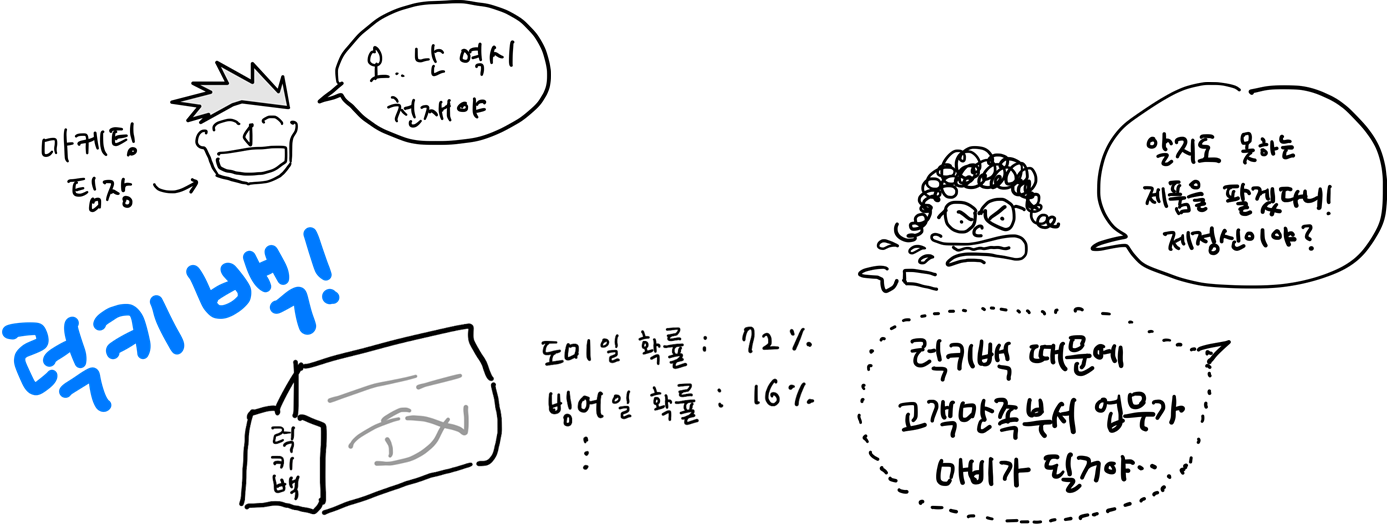

In [ ]:
# 길이, 무게(+높이, 두께, 대각선...)

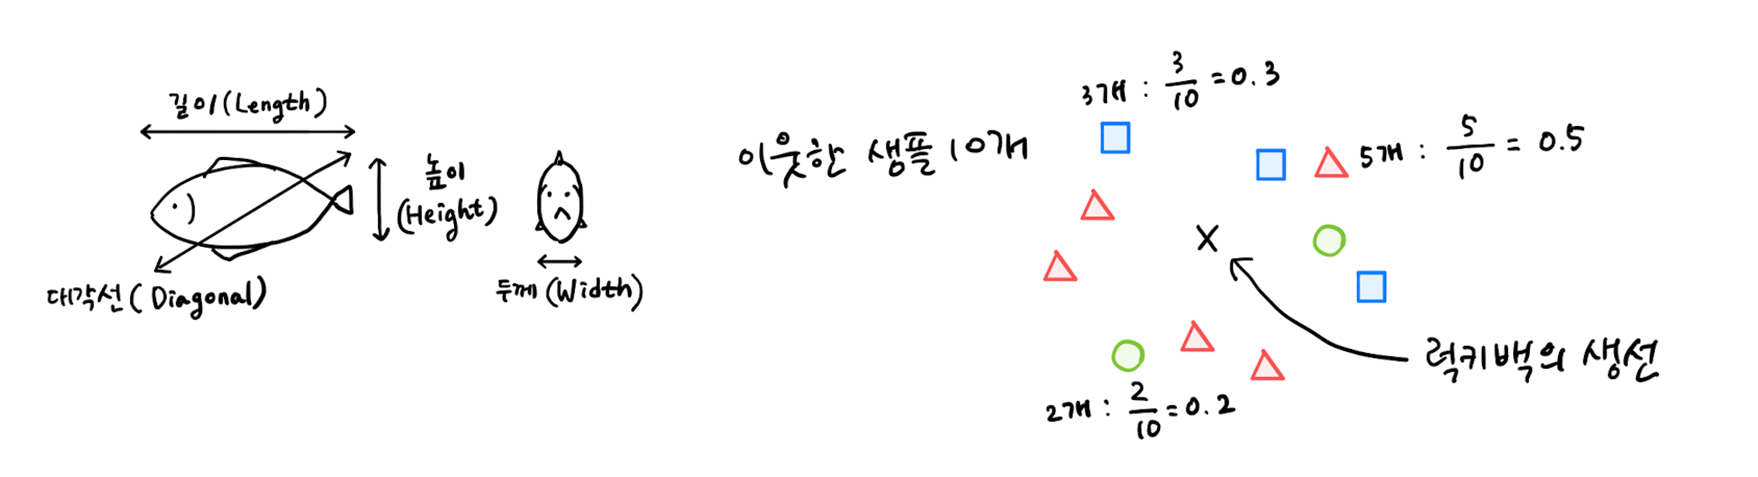

In [ ]:
# 확률을 알고싶기에 회귀 사용
import pandas as pd # 판다스로 csv를 처리함

fish = pd.read_csv('https://bit.ly/fish_csv_data') # 웹에 있는 파일을 가져옴
fish.head() # 제일 위쪽 데이터 5개를 보여줌
# 어종, 무게, 길이, 대각선, 높이, 너비(두께)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [82]:
fish['Species'].value_counts()  # 각 종별 개수 출력
# Perch → 농어
# Bream → 도미
# Roach → 잉어과 붕어류
# Pike → 강꼬치고기
# Smelt → 빙어
# Parkki → (특정 번역 없음, 핀란드 지역 담수어)
# Whitefish → 흰살생선 (연어과 흰살 민물고기)

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


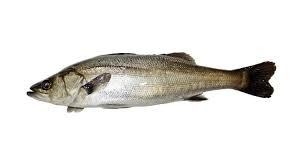 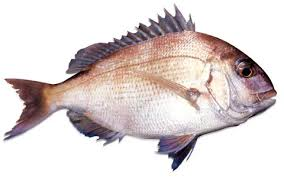 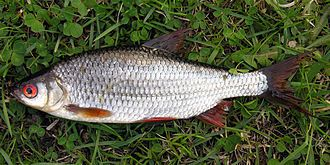 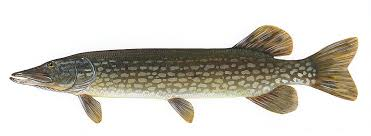 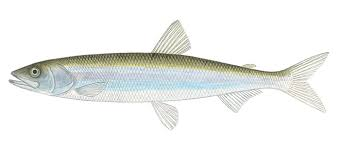 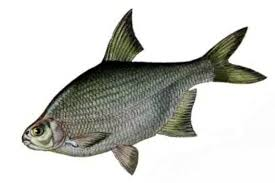 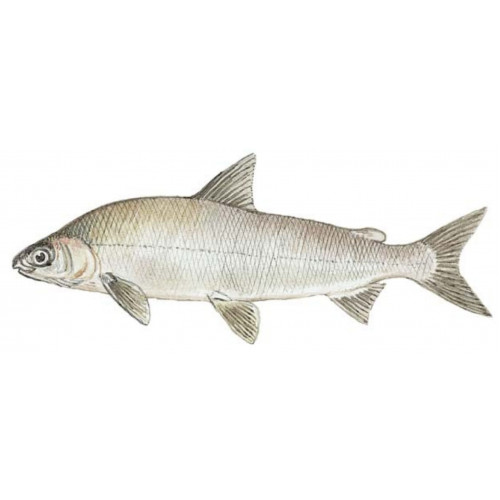

In [17]:
fish[['Weight','Length','Diagonal','Height','Width']].head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [11]:
# 분석용 입력 리스트값 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# 원하는 필드를 넣어 필터링
print(fish_input[:5])  # 앞에서부터 5개만 출력

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [16]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [37]:
# 훈련셋 생성
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

print(train_input.shape, test_input.shape)
print(train_input[:5])
print(train_target[:5])
print(test_target[:5])

(119, 5) (40, 5)
[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


In [28]:
from sklearn.preprocessing import StandardScaler # 표준점수화

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [57]:
from sklearn.neighbors import KNeighborsClassifier # 분류용

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target)) # 0.89
print(kn.score(test_scaled, test_target))   # 0.85

print(kn.classes_) # 오름차순으로 출력됨
# 2개이상 클래스가 포함된 문제를 다중 분류라고 함

0.8907563025210085
0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [58]:
print(kn.predict(test_scaled[:5]))
# ['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch'] 을
# ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch'] 로 예측
# Perch 의 표본수가 많아서...

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [44]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
# 사이킷 런이 번거러운 연산을 수행해줌으로 쉽게 결과가 나옴
print(np.round(proba, decimals=4))
# 소수점 네번째 자리까지 표시(다섯번째에서 반올림)
# Bream Parkki Perch Pike   Roach  Smelt Whitefish' 이순서

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [60]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인 필요함
distances, indexes = kn.kneighbors(test_scaled[:5])
print(train_target[indexes])

[['Perch' 'Perch' 'Perch']
 ['Smelt' 'Smelt' 'Smelt']
 ['Pike' 'Pike' 'Pike']
 ['Roach' 'Perch' 'Perch']
 ['Perch' 'Perch' 'Roach']]


In [ ]:
# 로지스틱 회귀(LogisticRegression)
from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀는 (이름이 회귀지만) 분류 모델

# 선형회귀와 동일하게 선형방정식을 학습한다.
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# a, b, c, d, e, f 는 각 항목에 대한 가중치(중요도, 계수) 임
# z는 어떤 값도 가능함 하지만 확률이 되려면 0~1 (0% ~ 100%) 사이값
# z가 아주 큰 음수일때 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수나 로지스틱 함수

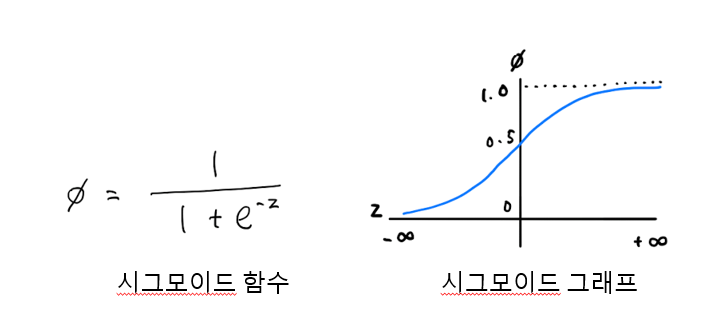

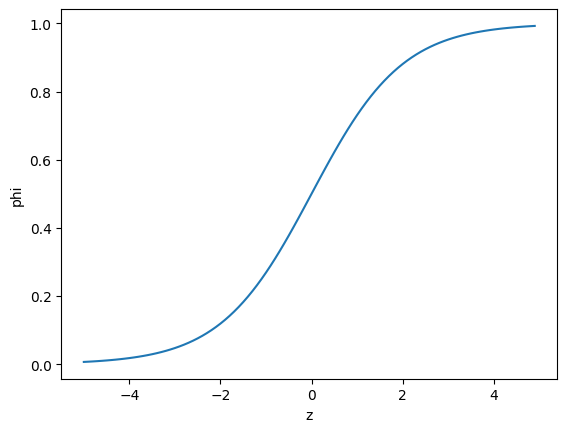

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용 : z가 무한하게 큰 음수 일 경우 0에 가까워짐, z가 무한하게 큰 양수 일 경우 1에 가까워짐
z = np.arange(-5, 5, 0.1) # -5~5까지 0.1 간격으로 배열 생성
phi = 1 / (1 + np.exp(-z)) # np.exp() 함수로 시그모이드 적용

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
# 훈련전에 2진분류부터 알아 보자.
# 시그모이드 함수 출력이 0.5 보다 크면 양성, 0.5 보다 작으면 음성으로 판단
# 단. 0.5가 나오면 사이킷런은 음성으로 판단

In [64]:
# 로지스틱 회귀로 이진 분류 수행 테스트

# 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. (불리언 인덱싱)
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) # 불리언 인덱싱
# 결과 : True 값만 출력됨


['A' 'C']


In [84]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # or
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_target[:5])
print(bream_smelt_indexes[:5])
print(train_scaled[:5])
print(train_bream_smelt[:5])
print(train_target[:5])
print(target_bream_smelt[:5])

print(len(train_scaled))
print(len(train_bream_smelt))
#print(train_bream_smelt.shape, target_bream_smelt.shape)

['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']
[ True False  True False False]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]]
['Bream' 'Pike' 'Smelt' 'Perch' 'Parkki']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
119
33


In [85]:
from sklearn.linear_model import LogisticRegression # 로지스틱회귀

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [86]:
print(lr.predict(train_bream_smelt[:5])) # 도미 4개 , 빙어 1개
print(lr.predict_proba(train_bream_smelt[:5])) # 확율 확인(predict_proba)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [87]:
# 샘플마다 2개의 확률이 출력된다. (시그모이드 함수)
# 첫번째 열이 0(음성)에 대한 확율, 두번째 열이 1(양성)에 대한 확율임
# 사이킷런의 타깃 값은 알파벳 순으로 정렬해서 사용함
print(lr.classes_) # Smelt(빙어)가 양성으로 사용됨
# 두번째 샘플만 양성 클래스인 빙어의 확률이 높다. (나머지는 도미로 예측함)
# 만약 도미(Bream)를 양성 클래스로 사용하고 싶으면
# 전에 전처리에서 Bream인 타겟값을 1로 만들어야 함


['Bream' 'Smelt']


In [88]:
# 로지스틱 회귀로 학습한 계수(중요도)를 봐보자.
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [89]:
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f

decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z값을 출력해보자.
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [90]:
from scipy.special import expit

print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [93]:
x = -6.02991358
print(1 / (1 + np.exp(-x)))  # np.exp(x)는 e^x를 의미

0.0023999283582517646


In [94]:
# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)
# max_iter=100 반복횟수를 100으로 하면 부족하다라는 경고 문구가 나와 1000으로 향상
# LogisticRegression 기본적으로 릿지 회귀와 같은 규제방법을 사용한다. (L2 규제)
# 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절 하였음 -> alpha가 크면 규제도 커짐
# LogisticRegression 에서는 규제를 제어하는 매개변수가 C 로 되어있음 -> C가 작으면 규제가 커짐(기본값은 1)

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target)) # 93%
print(lr.score(test_scaled, test_target))   # 92.5%

0.9327731092436975
0.925


In [100]:
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [102]:
# 다중 분류일때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) 이 데이터는 5개의 특성을 사용함, 7행을 가짐
# (7,)  7개의 행 -> 이진 분류에서 보았던 z을 7개를 계산함.
# 다중 분류는 클래스마다 z 값을 하나씩 계산 한다는 의미다.
# 당연히 가장 높은  z 값을 출력하는 클래스가 예측 클래스가 됨
print(lr.coef_)

(7, 5) (7,)
[[-1.50605456 -1.03747913  2.60919713  7.69422741 -1.18603342]
 [ 0.19200046 -1.99988812 -3.79617724  6.5031264  -2.00022753]
 [ 3.55793539  6.36988929 -8.52233733 -5.75397233  3.79233437]
 [-0.11453309  3.61060122  3.94464503 -3.62243904 -1.75981679]
 [-1.40843718 -6.09242191  5.28629634 -0.8669657   1.84518456]
 [-1.33419947  1.48153392  1.38217547 -5.6602348  -4.39228965]
 [ 0.61328845 -2.33223525 -0.90379939  1.70625807  3.70084846]]


In [ ]:
# 이진 분류- 시그모이드 함수
# 다중 분류- 소프트맥스 함수

# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum ->  s1 ~ s7 까지 모두 더하면 분모가 같아져 1이 됨

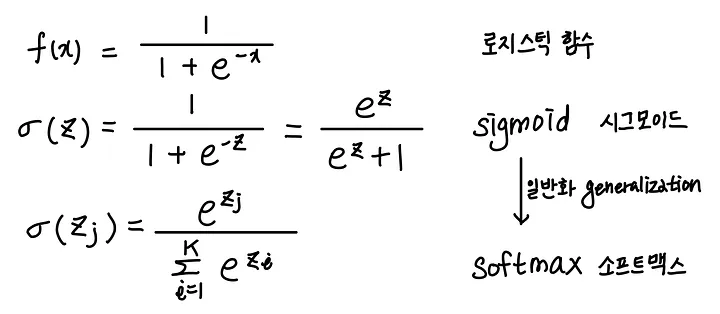

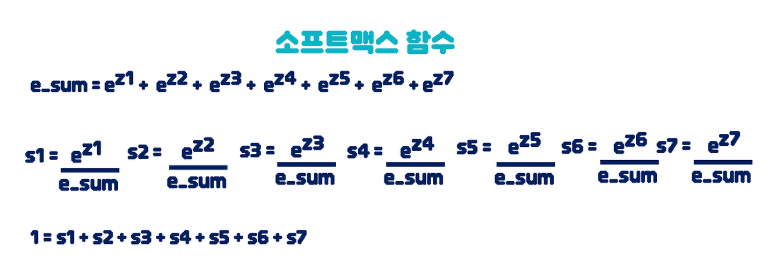

In [170]:
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1 ~ z7의 값\n")
for idx, z in enumerate(decision):
    s = []
    z = np.round(z, 2)
    e_sum = 0  # e_sum을 여기서 초기화 (각 샘플마다)
    print(f"{idx+1}번째 샘플\n")
    print("z:", z)
    print("e^z: ", end = "")

    # 전체 e_sum 계산
    for i in range(7):
        e_sum += np.exp(z[i])  # 모든 np.exp(z[i]) 값의 합을 계산

    # 확률 계산 (소프트맥스)
    for i in range(7):
        print(round(np.exp(z[i]),3), end="  ")
        s_i = round(np.exp(z[i])*100 / e_sum,2)  # 각 값에 대해 확률을 계산
        s.append(s_i)

    e_sum = round(e_sum,1)

    print()
    print(f"s*100: {s}")  # 확률 값 출력
    print(f"e_sum: {e_sum}\n")


5개 샘플에 대한 z1 ~ z7의 값

1번째 샘플

z: [-6.51  1.04  5.17 -2.76  3.34  0.35 -0.63]
e^z: 0.001  2.829  175.915  0.063  28.219  1.419  0.533  
s*100: [0.0, 1.35, 84.18, 0.03, 13.5, 0.68, 0.25]
e_sum: 209.0

2번째 샘플

z: [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
e^z: 0.0  6.959  119.104  0.089  19.886  2540.205  0.014  
s*100: [0.0, 0.26, 4.43, 0.0, 0.74, 94.56, 0.0]
e_sum: 2686.3

3번째 샘플

z: [-4.34 -6.24  3.17  6.48  2.36  2.43 -3.87]
e^z: 0.013  0.002  23.807  651.971  10.591  11.359  0.021  
s*100: [0.0, 0.0, 3.41, 93.44, 1.52, 1.63, 0.0]
e_sum: 697.8

4번째 샘플

z: [-0.69  0.45  2.64 -1.21  3.26 -5.7   1.26]
e^z: 0.502  1.568  14.013  0.298  26.05  0.003  3.525  
s*100: [1.09, 3.41, 30.49, 0.65, 56.68, 0.01, 7.67]
e_sum: 46.0

5번째 샘플

z: [-6.4  -1.99  5.82 -0.13  3.5  -0.09 -0.7 ]
e^z: 0.002  0.137  336.972  0.878  33.115  0.914  0.497  
s*100: [0.0, 0.04, 90.46, 0.24, 8.89, 0.25, 0.13]
e_sum: 372.5



In [168]:
from scipy.special import softmax
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = (softmax(decision, axis=1)*100).round(2) # 가로 백분율
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki  Perch   Pike  Roach  Smelt Whitefish  예측 결과
0   0.0   1.36   84.2   0.03  13.48   0.68      0.26  Perch
1   0.0   0.26   4.41    0.0   0.74  94.59       0.0  Smelt
2   0.0    0.0    3.4  93.44   1.52   1.63       0.0   Pike
3  1.09    3.4  30.54   0.65  56.68   0.01      7.64  Roach
4   0.0   0.04  90.43   0.24   8.92   0.25      0.13  Perch
